<a href="https://colab.research.google.com/github/SwapnilMergu/n-n-home-assignment-2/blob/main/home_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

#Define the 5×5 input matrix
input_matrix = np.arange(1,26).reshape(5,5)

#Reshape to TensorFlow format: (batch, height, width, channels) 1 image 5x5 image size and 1 channels i.e. grayscale
input_tensor = tf.reshape(tf.constant(input_matrix, dtype=tf.float32), [1, 5, 5, 1])

#Define the 3×3 kernel
kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
], dtype=np.float32)

#Reshape kernel to (height, width, in_channels, out_channels)
kernel_tensor = tf.reshape(kernel, [3, 3, 1, 1])

#Helper function to apply convolution
def apply_conv(input_tensor, kernel_tensor, stride, padding):
    return tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, stride, stride, 1], padding=padding)

#Perform convolutions
conv_valid_1 = apply_conv(input_tensor, kernel_tensor, stride=1, padding='VALID') #move 1 pixel at a time and no zero padding
conv_same_1 = apply_conv(input_tensor, kernel_tensor, stride=1, padding='SAME') #move 1 pixel at a time and add zero padding
conv_valid_2 = apply_conv(input_tensor, kernel_tensor, stride=2, padding='VALID')#move 2 pixel at a time and no zero padding
conv_same_2 = apply_conv(input_tensor, kernel_tensor, stride=2, padding='SAME') #move 1 pixel at a time and add zero padding

#Print the output feature maps
print("Stride=1, Padding='VALID':\n", tf.squeeze(conv_valid_1).numpy())
print("\nStride=1, Padding='SAME':\n", tf.squeeze(conv_same_1).numpy())
print("\nStride=2, Padding='VALID':\n", tf.squeeze(conv_valid_2).numpy())
print("\nStride=2, Padding='SAME':\n", tf.squeeze(conv_same_2).numpy())


Stride=1, Padding='VALID':
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Stride=1, Padding='SAME':
 [[  4.   3.   2.   1.  -6.]
 [ -5.   0.   0.   0. -11.]
 [-10.   0.   0.   0. -16.]
 [-15.   0.   0.   0. -21.]
 [-46. -27. -28. -29. -56.]]

Stride=2, Padding='VALID':
 [[0. 0.]
 [0. 0.]]

Stride=2, Padding='SAME':
 [[  4.   2.  -6.]
 [-10.   0. -16.]
 [-46. -28. -56.]]


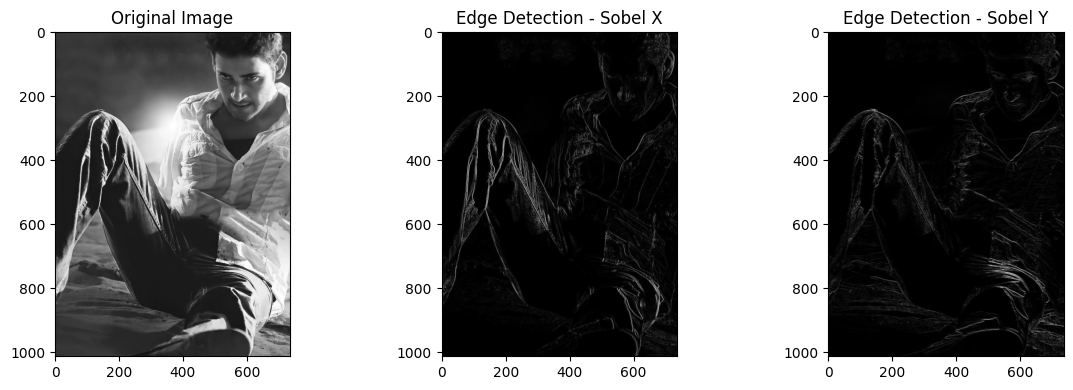

In [ ]:
#Task 2.1
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import urllib.request

#1 Load image from URL
url = 'https://i.pinimg.com/736x/44/de/cd/44decd5c022ba574459dd82814d82401.jpg' #image location
resp = urllib.request.urlopen(url) #get the raw binary image data
image_data = np.asarray(bytearray(resp.read()), dtype=np.uint8) #convert to byte array then to numpy array 8 bit integer for 1 pixel
img = cv2.imdecode(image_data, cv2.IMREAD_GRAYSCALE) # decodes and convert byte numpy array to grey scale

#Define custom Sobel filters
#Detect vertical edges
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

#Detect horizontal edges
sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

#Apply convolution
edges_x = convolve2d(img, sobel_x, mode='same', boundary='symm') #symmetric pedding around edges
edges_y = convolve2d(img, sobel_y, mode='same', boundary='symm') #symmetric pedding around edges

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(np.abs(edges_x), cmap='gray')
plt.title('Edge Detection - Sobel X')

plt.subplot(1, 3, 3)
plt.imshow(np.abs(edges_y), cmap='gray')
plt.title('Edge Detection - Sobel Y')

plt.tight_layout()
plt.show()

In [ ]:
#Task 2.2
import tensorflow as tf

#Create a random 4x4 matrix
input_matrix = tf.random.uniform(shape=(1, 4, 4, 1), minval=0, maxval=10, dtype=tf.float32)

#Max Pooling
max_pooled = tf.nn.max_pool2d(input_matrix, ksize=2, strides=2, padding='VALID') #pick maximum value from each 2x2 block #move 2 pixel at a time and no zero padding

#Average Pooling
avg_pooled = tf.nn.avg_pool2d(input_matrix, ksize=2, strides=2, padding='VALID') #pick average maximum value in each 2×2 block #move 2 pixel at a time and no zero padding.

# Print results
print("Original 4x4 Matrix:\n", tf.squeeze(input_matrix).numpy())
print("\nMax Pooled 2x2 Matrix:\n", tf.squeeze(max_pooled).numpy())
print("\nAverage Pooled 2x2 Matrix:\n", tf.squeeze(avg_pooled).numpy())

Original 4x4 Matrix:
 [[0.3704536  0.97933054 0.1904583  2.4807668 ]
 [0.12521029 7.303609   0.45325756 3.4565866 ]
 [4.3377995  1.1499202  9.516682   9.066749  ]
 [2.8914678  7.66191    1.6682041  8.315756  ]]

Max Pooled 2x2 Matrix:
 [[7.303609  3.4565866]
 [7.66191   9.516682 ]]

Average Pooled 2x2 Matrix:
 [[2.194651  1.6452672]
 [4.0102744 7.1418476]]


Original Dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Min-Max Normalized Dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667

Z-score Standardizated Dataset:
    se

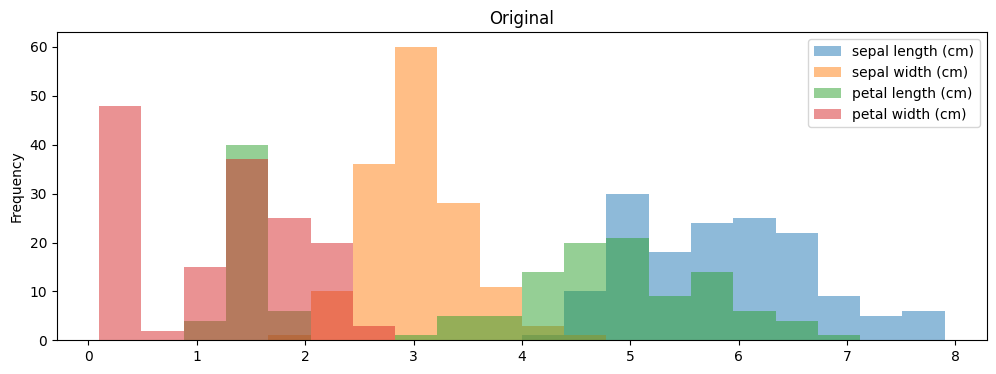

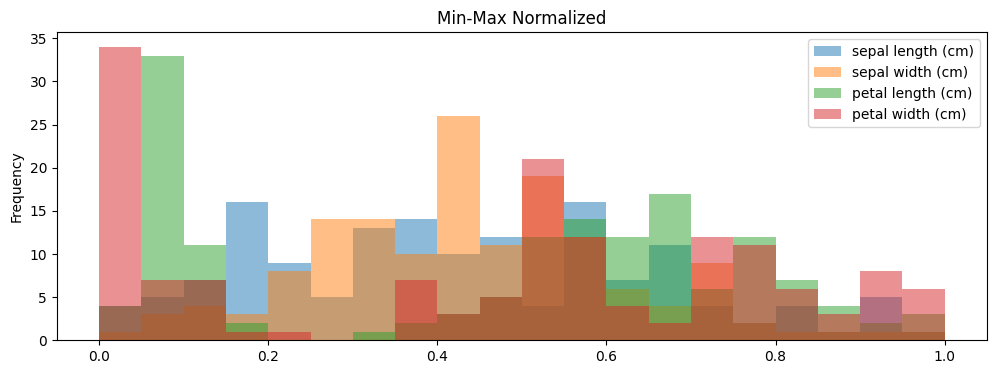

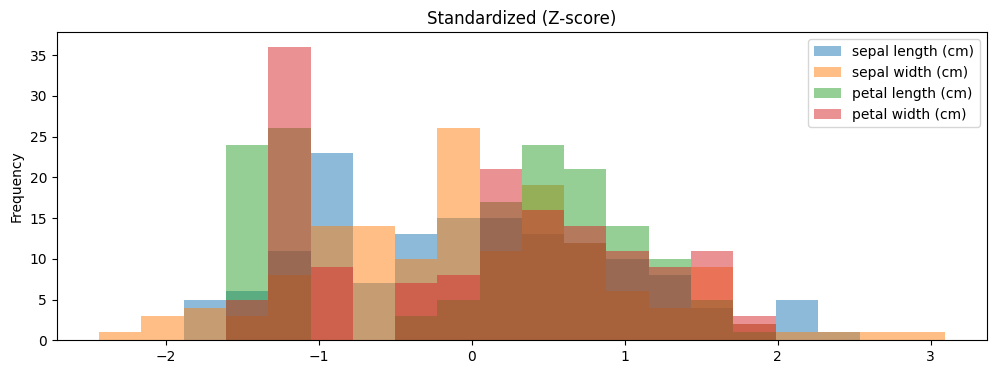

Original Accuracy: 1.0000
Min-Max Normalized Accuracy: 0.9667
Z-score Standardized Accuracy: 1.0000


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Convert to DataFrame for easy viewing
df = pd.DataFrame(X, columns=iris.feature_names)
print("Original Dataset:\n", df.head())


# Apply Min-Max Normalization
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)

#Rescale the data to fixed range [0,1]

# Convert to DataFrame for comparison
df_minmax = pd.DataFrame(X_minmax, columns=iris.feature_names)
print("\nMin-Max Normalized Dataset:\n", df_minmax.head())

# Apply Z-score Standardization
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)

#Centers the data around 0 and scales to unit variance

# Convert to DataFrame
df_std = pd.DataFrame(X_std, columns=iris.feature_names)
print("\nZ-score Standardizated Dataset:\n", df_std.head())

# Plot histogram for comparison
df.plot(kind='hist', title='Original', alpha=0.5, legend=True, figsize=(12, 4), bins=20)
df_minmax.plot(kind='hist', title='Min-Max Normalized', alpha=0.5, legend=True, figsize=(12, 4), bins=20)
df_std.plot(kind='hist', title='Standardized (Z-score)', alpha=0.5, legend=True, figsize=(12, 4), bins=20)
plt.show()


def train_logreg(X_data, y_data, label):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{label} Accuracy: {acc:.4f}")

train_logreg(X, y, "Original")
train_logreg(X_minmax, y, "Min-Max Normalized")
train_logreg(X_std, y, "Z-score Standardized")


